# <span style="color:DarkOliveGreen">Result Analysis on CDX.NA.IG Forecasting

__Summary:__ <span style="color:Blue">Comparing the results from LSTM, LSTM+Hurst and SVR Models

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hurst as hs
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import datetime

np.random.seed(0)

In [2]:
# User defined names
index = "CDX.NA.IG"
filename = "input_data.csv"
date_col = "Date"

In [3]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\rsingh\Desktop\WorldQuant\Capstone\Draft Submission\MScFE_Capstone-main\Notebooks


In [4]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

#### <span style="color:DarkOliveGreen">Read input data as df:

In [5]:
# Read the data
df = pd.read_csv(filename, index_col=date_col)
df.index = pd.to_datetime(df.index)
df.head()

,IG_BO,SPX,VIX,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID
Date,,,,,,,,,,,,,,
2012-01-01,1.500,1257.61,23.40,0.02,0.06,0.12,0.25,0.36,0.83,1.35,1.89,2.57,2.89,120.000
2012-01-02,1.500,1257.61,23.40,0.02,0.06,0.12,0.25,0.36,0.83,1.35,1.89,2.57,2.89,120.000
2012-01-03,1.000,1277.06,22.97,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98,118.000
2012-01-04,1.000,1277.30,22.22,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03,118.750
2012-01-05,0.917,1281.06,21.48,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06,120.001


In [6]:
print("shape:",df.shape)
print("first date:",df.index[0])
print("last date:",df.index[-1])

shape: (4018, 14)
first date: 2012-01-01 00:00:00
last date: 2022-12-31 00:00:00


#### <span style="color:DarkOliveGreen">Read LSTM results as lstm_train_df and lstm_test_df:

In [7]:
lstm_train_df = pd.read_csv('lstm_train_res.csv')#, index_col=date_col)
lstm_train_df.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
lstm_train_df.head()

,Date,IG_MID,lstm_fit
0,2012-01-01,120.000,119.818820
1,2012-01-02,118.000,119.818820
2,2012-01-03,118.750,117.902855
3,2012-01-04,120.001,118.622710
4,2012-01-05,120.000,119.819770


In [27]:
lstm_test_df = pd.read_csv('lstm_test_res.csv')#, index_col=date_col)
lstm_test_df.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
lstm_test_df.head()

,Date,IG_MID,lstm_predict
0,2021-11-26,57.454,53.086490
1,2021-11-27,57.454,57.459650
2,2021-11-28,57.454,57.459650
3,2021-11-29,55.083,57.459650
4,2021-11-30,57.687,55.116882


#### <span style="color:DarkOliveGreen">Read LSTM+Hurst results as lstm_hurst_train_df and lstm_hurst_test_df:

In [9]:
lstm_hurst_train_df = pd.read_csv('lstm_hurst_train_res.csv')#, index_col=date_col)
lstm_hurst_train_df.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
lstm_hurst_train_df.head()

,Date,IG_MID,lstm_hurst_fit
0,2012-01-01,120.000,116.157814
1,2012-01-02,118.000,116.157814
2,2012-01-03,118.750,114.386510
3,2012-01-04,120.001,115.052284
4,2012-01-05,120.000,116.158690


In [10]:
lstm_hurst_test_df = pd.read_csv('lstm_hurst_test_res.csv')#, index_col=date_col)
lstm_hurst_test_df.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
lstm_hurst_test_df.head()

,Date,IG_MID,lstm_hurst_predict
0,2021-11-26,57.454,53.777850
1,2021-11-27,57.454,57.806396
2,2021-11-28,57.454,57.811028
3,2021-11-29,55.083,57.800440
4,2021-11-30,57.687,55.608112


#### <span style="color:DarkOliveGreen">Read SVM results as svm_train_df and svm_test_df:

In [11]:
svm_train_df = pd.read_csv('svm_train_res.csv')#, index_col=date_col)
svm_train_df.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
svm_train_df.head()

,Date,IG_MID,svm_fit
0,2012-01-01,120.000,120.009851
1,2012-01-02,120.000,119.989742
2,2012-01-03,118.000,118.137969
3,2012-01-04,118.750,118.740485
4,2012-01-05,120.001,119.997760


In [13]:
svm_test_df = pd.read_csv('svm_test_res.csv')#, index_col=date_col)
svm_test_df.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
svm_test_df.head()

,Date,IG_MID,svm_predict
0,2021-11-25,53.020,55.060512
1,2021-11-26,57.454,60.078426
2,2021-11-27,57.454,65.667874
3,2021-11-28,57.454,69.262382
4,2021-11-29,55.083,70.565937


#### <span style="color:DarkOliveGreen">Compare RMSEs of various models:

In [34]:
train_dates = [datetime.datetime.strptime(dt, '%Y-%m-%d').date() for dt in lstm_train_df['Date']]
test_dates = [datetime.datetime.strptime(dt, '%Y-%m-%d').date() for dt in lstm_test_df['Date']]

svm_train_dates = [datetime.datetime.strptime(dt, '%Y-%m-%d').date() for dt in svm_train_df['Date']]
svm_test_dates = [datetime.datetime.strptime(dt, '%Y-%m-%d').date() for dt in svm_test_df['Date']]

In [50]:
# calculate Training Fitted RMSEs
org_y_train = lstm_train_df['IG_MID']
lstm_train = lstm_train_df['lstm_fit']
lstm_hurst_train = lstm_hurst_train_df['lstm_hurst_fit']
svm_train = svm_train_df['svm_fit']

lstm_train_rmse = round(np.sqrt(mean_squared_error(org_y_train, lstm_train)),3)
print('LSTM Training Fit RMSE: %.3f' % lstm_train_rmse)

lstm_hurst_train_rmse = round(np.sqrt(mean_squared_error(org_y_train, lstm_hurst_train)),3)
print('LSTM+Hurst Training Fit RMSE: %.3f' % lstm_hurst_train_rmse)

svm_train_rmse = round(np.sqrt(mean_squared_error(svm_train_df['IG_MID'], svm_train)),3)
print('SVM Training Fit RMSE: %.3f' % svm_train_rmse)

LSTM Training Fit RMSE: 2.002
LSTM+Hurst Training Fit RMSE: 2.248
SVM Training Fit RMSE: 0.901


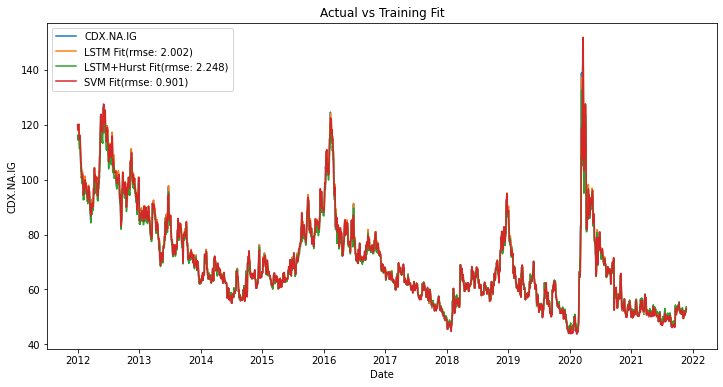

In [51]:
plt.figure(figsize=(12,6))

plt.plot(train_dates,org_y_train,label='CDX.NA.IG')
plt.plot(train_dates,lstm_train,label='LSTM Fit(rmse: '+ str(lstm_train_rmse) + ')')
plt.plot(train_dates,lstm_hurst_train,label='LSTM+Hurst Fit(rmse: '+ str(lstm_hurst_train_rmse) + ')')
plt.plot(svm_train_dates,svm_train_df['svm_fit'],label='SVM Fit(rmse: '+ str(svm_train_rmse) + ')')
plt.title('Actual vs Training Fit')
plt.xlabel('Date')
plt.ylabel('CDX.NA.IG')
plt.legend()
plt.show()

In [53]:
# calculate Test predictted RMSEs
org_y_test = lstm_test_df['IG_MID']
lstm_test = lstm_test_df['lstm_predict']
lstm_hurst_test = lstm_hurst_test_df['lstm_hurst_predict']
svm_test = svm_test_df['svm_predict']

lstm_test_rmse = round(np.sqrt(mean_squared_error(org_y_test, lstm_test)),3)
print('LSTM testing predict RMSE: %.3f' % lstm_test_rmse)

lstm_hurst_test_rmse = round(np.sqrt(mean_squared_error(org_y_test, lstm_hurst_test)),3)
print('LSTM+Hurst testing predict RMSE: %.3f' % lstm_hurst_test_rmse)

svm_test_rmse = round(np.sqrt(mean_squared_error(svm_test_df['IG_MID'], svm_test)),3)
print('SVM testing predict RMSE: %.3f' % svm_test_rmse)

LSTM testing predict RMSE: 2.217
LSTM+Hurst testing predict RMSE: 2.465
SVM testing predict RMSE: 16.973


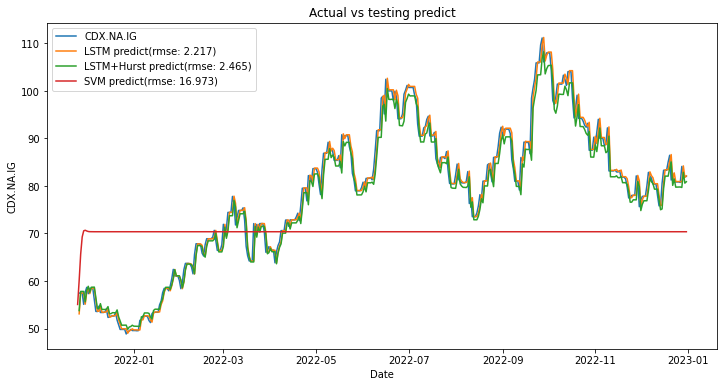

In [54]:
plt.figure(figsize=(12,6))

plt.plot(test_dates,org_y_test,label='CDX.NA.IG')
plt.plot(test_dates,lstm_test,label='LSTM predict(rmse: '+ str(lstm_test_rmse) + ')')
plt.plot(test_dates,lstm_hurst_test,label='LSTM+Hurst predict(rmse: '+ str(lstm_hurst_test_rmse) + ')')
plt.plot(svm_test_dates,svm_test_df['svm_predict'],label='SVM predict(rmse: '+ str(svm_test_rmse) + ')')
plt.title('Actual vs testing predict')
plt.xlabel('Date')
plt.ylabel('CDX.NA.IG')
plt.legend()
plt.show()